# Pandas: Groupby

`groupby` is an amazingly powerful function in pandas. But it is also complicated to use and understand.
The point of this lesson is to make you feel confident in using `groupby` and its cousins, `resample` and `rolling`. 

These notes are loosely based on the [Pandas GroupBy Documentation](http://pandas.pydata.org/pandas-docs/stable/groupby.html).

The "split/apply/combine" concept was first introduced in a paper by Hadley Wickham: <https://www.jstatsoft.org/article/view/v040i01>.


Imports:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12,7)
%matplotlib inline
import pandas as pd

First we read the Earthquake data from our previous assignment:

In [2]:
df = pd.read_csv('http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv', parse_dates=['time'], index_col='id')
df['country'] = df.place.str.split(', ').str[-1]
df_small = df[df.mag<4]
df = df[df.mag>4]
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
usc000mqlp,2014-01-31 23:08:03.660,-4.9758,153.9466,110.18,4.2,mb,NaN,98.0,1.940,0.61,us,2014-04-08T01:43:19.000Z,"115km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
usc000mqln,2014-01-31 22:54:32.970,-28.1775,-177.9058,95.84,4.3,mb,NaN,104.0,1.063,1.14,us,2014-04-08T01:43:19.000Z,"120km N of Raoul Island, New Zealand",earthquake,New Zealand
usc000mqls,2014-01-31 22:49:49.740,-23.1192,179.1174,528.34,4.4,mb,NaN,80.0,5.439,0.95,us,2014-04-08T01:43:19.000Z,South of the Fiji Islands,earthquake,South of the Fiji Islands
usc000mf1x,2014-01-31 22:19:44.330,51.1569,-178.0910,37.50,4.2,mb,NaN,NaN,NaN,0.83,us,2014-04-08T01:43:19.000Z,"72km E of Amatignak Island, Alaska",earthquake,Alaska
usc000mqlm,2014-01-31 21:56:44.320,-4.8800,153.8434,112.66,4.3,mb,NaN,199.0,1.808,0.79,us,2014-04-08T01:43:19.000Z,"100km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea


## An Example

This is an example of a "one-liner" that you can accomplish with groupby.

<Axes: xlabel='country'>

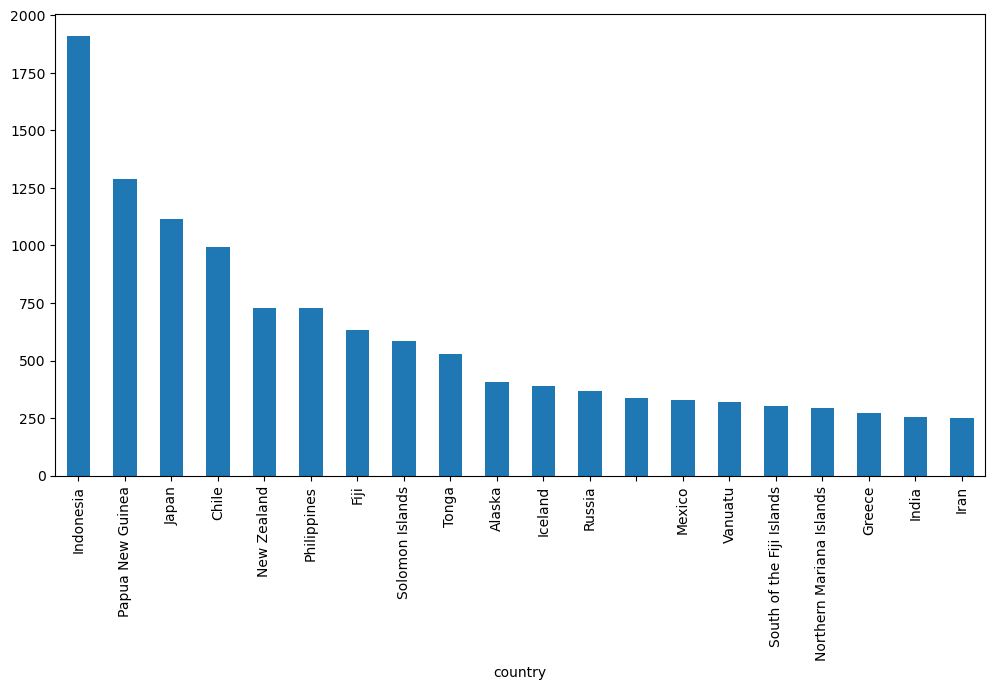

In [3]:
df.groupby('country').mag.count().nlargest(20).plot(kind='bar', figsize=(12,6))

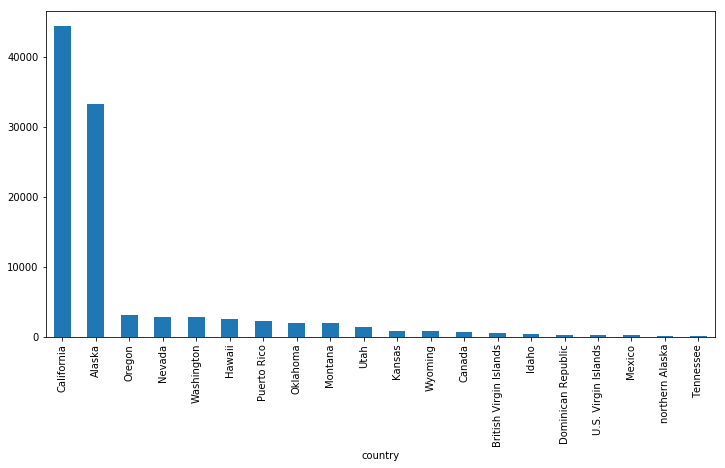

In [4]:
df_small.groupby('country').mag.count().nlargest(20).plot(kind='bar', figsize=(12,6))

## What Happened?

Let's break apart this operation a bit. The workflow with `groubpy` can be divided into three general steps:

1. **Split**: Partition the data into different groups based on some criterion.
1. **Apply**: Do some caclulation within each group. Different types of "apply" steps might be
  1. *Aggregation*: Get the mean or max within the group.
  1. *Transformation*: Normalize all the values within a group
  1. *Filtration*: Eliminate some groups based on a criterion.
1. **Combine**: Put the results back together into a single object.

![split-apply-combine](https://miro.medium.com/max/1840/1*JbF6nhrQsn4f-TaSF6IR9g.png)

### The `groupby` method

Both `Series` and `DataFrame` objects have a groupby method. It accepts a variety of arguments, but the simplest way to think about it is that you pass another series, whose unique values are used to split the original object into different groups.

via <https://medium.com/analytics-vidhya/split-apply-combine-strategy-for-data-mining-4fd6e2a0cc99>

In [4]:
df.groupby(df.country)

There is a shortcut for doing this with dataframes: you just pass the column name:

In [5]:
df.groupby('country')

### The `GroubBy` object

When we call, `groupby` we get back a `GroupBy` object:

In [6]:
gb = df.groupby('country')
gb

The length tells us how many groups were found:

In [7]:
len(gb)

262

All of the groups are available as a dictionary via the `.groups` attribute:

In [16]:
groups = gb.groups
len(groups)

262

In [21]:
list(groups.keys())
# list(groups.keys())[2]

['',
 'Afghanistan',
 'Alaska',
 'Albania',
 'Algeria',
 'American Samoa',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Argentina',
 'Arizona',
 'Aruba',
 'Ascension Island region',
 'Australia',
 'Azerbaijan',
 'Azores Islands region',
 'Azores-Cape St. Vincent Ridge',
 'Balleny Islands region',
 'Banda Sea',
 'Bangladesh',
 'Barbados',
 'Barbuda',
 'Bay of Bengal',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Bouvet Island',
 'Bouvet Island region',
 'Brazil',
 'British Indian Ocean Territory',
 'British Virgin Islands',
 'Burma',
 'Burundi',
 'California',
 'Canada',
 'Cape Verde',
 'Carlsberg Ridge',
 'Cayman Islands',
 'Celebes Sea',
 'Central East Pacific Rise',
 'Central Mid-Atlantic Ridge',
 'Chagos Archipelago region',
 'Chile',
 'China',
 'Christmas Island',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Crozet Islands region',
 'Cuba',
 'Cyprus',
 'Davis Strait',
 'Democratic Republic of the Congo',
 'Djibouti',
 'Dominica',
 'Dominican Republic',


### Iterating and selecting groups

You can loop through the groups if you want.

In [12]:
for key, group in gb:
    display(group.head())
    print(f'The key is "{key}"')
    break

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
usc000mkc8,2014-01-25 16:10:38.760,-55.2925,-27.0527,10.00,4.1,mb,NaN,97.0,5.553,0.35,us,2014-03-27T18:15:40.000Z,"156km N of Visokoi Island,",earthquake,
usc000mkc7,2014-01-25 09:43:23.230,-55.9434,-27.6772,103.48,4.3,mb,NaN,87.0,5.324,0.62,us,2014-03-27T18:15:40.000Z,"89km NNW of Visokoi Island,",earthquake,
usc000mh0c,2014-01-19 15:42:45.510,-56.9656,-26.7803,120.25,4.6,mb,NaN,151.0,6.120,0.39,us,2014-03-22T00:05:23.000Z,"39km SE of Visokoi Island,",earthquake,
usb000m7f2,2014-01-10 13:50:38.730,-56.0110,-26.1186,10.00,4.2,mb,NaN,106.0,6.192,0.71,us,2014-03-15T03:38:58.000Z,"101km NE of Visokoi Island,",earthquake,
usb000m78v,2014-01-07 06:51:09.160,-56.9651,-26.6696,124.37,4.3,mb,NaN,109.0,6.176,0.59,us,2014-03-07T00:26:01.000Z,"43km SE of Visokoi Island,",earthquake,


The key is ""


And you can get a specific group by key.

In [22]:
gb.get_group('Chile').head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
usc000mqlq,2014-01-31 20:00:16.000,-33.6550,-71.9810,25.10,4.5,mb,NaN,NaN,NaN,1.63,us,2014-04-08T01:43:19.000Z,"34km WSW of San Antonio, Chile",earthquake,Chile
usc000mql6,2014-01-31 13:48:23.000,-18.0690,-69.6630,149.10,4.3,mb,NaN,NaN,NaN,1.77,us,2014-04-08T01:43:18.000Z,"17km NW of Putre, Chile",earthquake,Chile
usc000mqk8,2014-01-30 14:20:56.560,-19.6118,-70.9487,15.16,4.1,mb,NaN,159.0,1.227,1.34,us,2014-04-08T01:43:17.000Z,"107km NW of Iquique, Chile",earthquake,Chile
usc000mdi2,2014-01-30 10:02:14.000,-32.1180,-71.7860,25.70,4.5,mwr,NaN,NaN,NaN,1.10,us,2015-01-30T21:28:21.955Z,"64km NW of La Ligua, Chile",earthquake,Chile
usc000mqeh,2014-01-29 18:58:23.000,-18.6610,-69.6440,123.10,4.8,mb,NaN,NaN,NaN,1.52,us,2014-04-08T01:43:16.000Z,"51km S of Putre, Chile",earthquake,Chile


## Aggregation

Now that we know how to create a `GroupBy` object, let's learn how to do aggregation on it.

One way us to use the `.aggregate` method, which accepts another function as its argument. The result is automatically combined into a new dataframe with the group key as the index.

In [34]:
import warnings
warnings.filterwarnings("ignore")

gb.aggregate(np.max).head()  #  perhaps remove

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
country,,,,,,,,,,,,,,
,2014-12-31 14:49:19.200,-37.5219,78.9418,248.18,6.9,mww,NaN,195.0,28.762,1.47,us,2015-03-17T02:38:27.040Z,"99km NW of Visokoi Island,",earthquake
Afghanistan,2014-12-27 06:37:50.010,37.0112,71.6062,248.39,5.6,mww,NaN,172.0,3.505,1.55,us,2015-06-22T20:12:10.712Z,"8km SE of Ashkasham, Afghanistan",earthquake
Alaska,2014-12-30 21:22:21.580,67.9858,179.9288,266.61,7.9,mww,152.0,338.0,7.712,2.15,us,2015-05-30T05:34:08.822Z,"9km WSW of Little Sitkin Island, Alaska",earthquake
Albania,2014-05-20 04:43:25.500,41.5297,20.2804,28.26,5.0,mwr,NaN,69.0,1.299,1.34,us,2015-01-30T15:28:03.533Z,"6km NE of Durres, Albania",earthquake
Algeria,2014-12-26 17:55:18.140,36.9391,5.6063,21.40,5.5,mww,NaN,174.0,3.250,1.45,us,2015-03-17T02:37:18.040Z,"5km SSW of Bougara, Algeria",earthquake


By default, the operation is applied to every column. That's usually not what we want. We can use both `.` or `[]` syntax to select a specific column to operate on. Then we get back a series.

In [35]:
gb.mag.aggregate(np.max).head()

country
               6.9
Afghanistan    5.6
Alaska         7.9
Albania        5.0
Algeria        5.5
Name: mag, dtype: float64

In [36]:
gb.mag.aggregate(np.max).nlargest(10)

country
Chile                         8.2
Alaska                        7.9
Solomon Islands               7.6
Papua New Guinea              7.5
El Salvador                   7.3
Mexico                        7.2
Fiji                          7.1
Indonesia                     7.1
Southern East Pacific Rise    7.0
                              6.9
Name: mag, dtype: float64

There are shortcuts for common aggregation functions:

In [16]:
gb.mag.max().nlargest(10)

country
Chile                         8.2
Alaska                        7.9
Solomon Islands               7.6
Papua New Guinea              7.5
El Salvador                   7.3
Mexico                        7.2
Fiji                          7.1
Indonesia                     7.1
Southern East Pacific Rise    7.0
                              6.9
Name: mag, dtype: float64

In [17]:
gb.mag.min().nsmallest(10)

country
Mexico         4.01
Oregon         4.02
California     4.04
               4.10
Afghanistan    4.10
Alaska         4.10
Albania        4.10
Algeria        4.10
Angola         4.10
Antarctica     4.10
Name: mag, dtype: float64

In [18]:
gb.mag.mean().nlargest(10)

country
South Napa Earthquake          6.020000
Bouvet Island region           5.750000
South Georgia Island region    5.450000
Barbados                       5.400000
New Mexico                     5.300000
Easter Island region           5.162500
Malawi                         5.100000
Drake Passage                  5.033333
North Korea                    5.000000
Saint Lucia                    5.000000
Name: mag, dtype: float64

In [19]:
gb.mag.std().nlargest(10)

country
Barbados                              1.555635
Bouvet Island region                  1.484924
Puerto Rico                           0.957601
Off the coast of Ecuador              0.848528
Palau region                          0.777817
East of the South Sandwich Islands    0.606495
Southern East Pacific Rise            0.604508
South Indian Ocean                    0.602194
Prince Edward Islands region          0.595259
Panama                                0.591322
Name: mag, dtype: float64

We can also apply multiple functions at once:

In [37]:
gb.mag.aggregate([np.min, np.max, np.mean]).head()

,min,max,mean
country,,,
,4.1,6.9,4.582544
Afghanistan,4.1,5.6,4.410656
Alaska,4.1,7.9,4.515025
Albania,4.1,5.0,4.391667
Algeria,4.1,5.5,4.583333


<Axes: xlabel='country'>

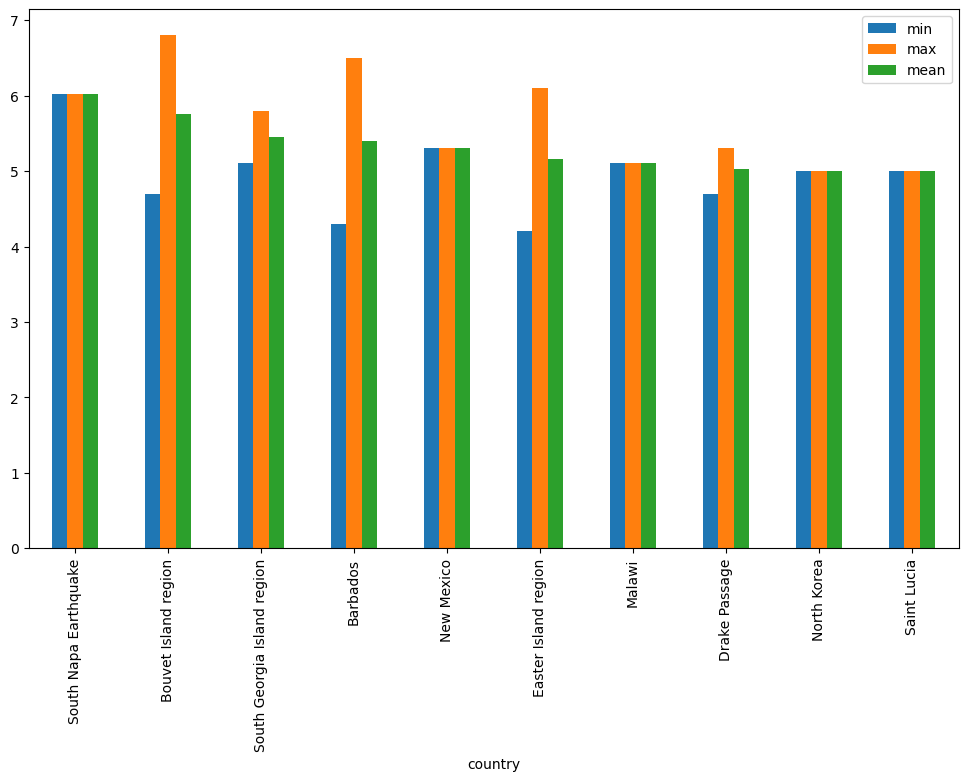

In [38]:
gb.mag.aggregate([np.min, np.max, np.mean]).nlargest(10, 'mean').plot(kind='bar')

## Transformation

The key difference between aggregation and transformation is that aggregation returns a *smaller* object than the original, indexed by the group keys, while *transformation* returns an object with the same index (and same size) as the original object. Groupby + transformation is used when applying an operation that requires information about the whole group.

In this example, we standardize the earthquakes in each country so that the distribution has zero mean and unit variance. We do this by first defining a function called `standardize` and then passing it to the `transform` method.

I admit that I don't know why you would want to do this. `transform` makes more sense to me in the context of time grouping operation. See below for another example.

In [41]:
def standardize(x):
    return (x - x.mean())/x.std()

mag_standardized_by_country = gb.mag.transform(standardize)
mag_standardized_by_country.head()

id
usc000mqlp   -0.915774
usc000mqln   -0.675696
usc000mqls   -0.282385
usc000mf1x   -0.684915
usc000mqlm   -0.666807
Name: mag, dtype: float64

## Time Grouping

We already saw how pandas has a strong built-in understanding of time. This capability is even more powerful in the context of `groupby`. With datasets indexed by a pandas `DateTimeIndex`, we can easily group and resample the data using common time units.

To get started, let's load the timeseries data we already explored in past lessons.

In [ ]:
import urllib
import pandas as pd

header_url = 'ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/HEADERS.txt'
with urllib.request.urlopen(header_url) as response:
    data = response.read().decode('utf-8')
lines = data.split('\n')
headers = lines[1].split(' ')

ftp_base = 'ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/'
dframes = []
for year in range(2016, 2019):
    data_url = f'{year}/CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(ftp_base + data_url, parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_998/2092298281.py:15: SyntaxWarning: invalid escape sequence '\s'
  names=headers, header=None, sep='\s+',


In [ ]:
df.head()

This timeseries has daily resolution, and the daily plots are somewhat noisy.

<Axes: xlabel='LST_DATE'>

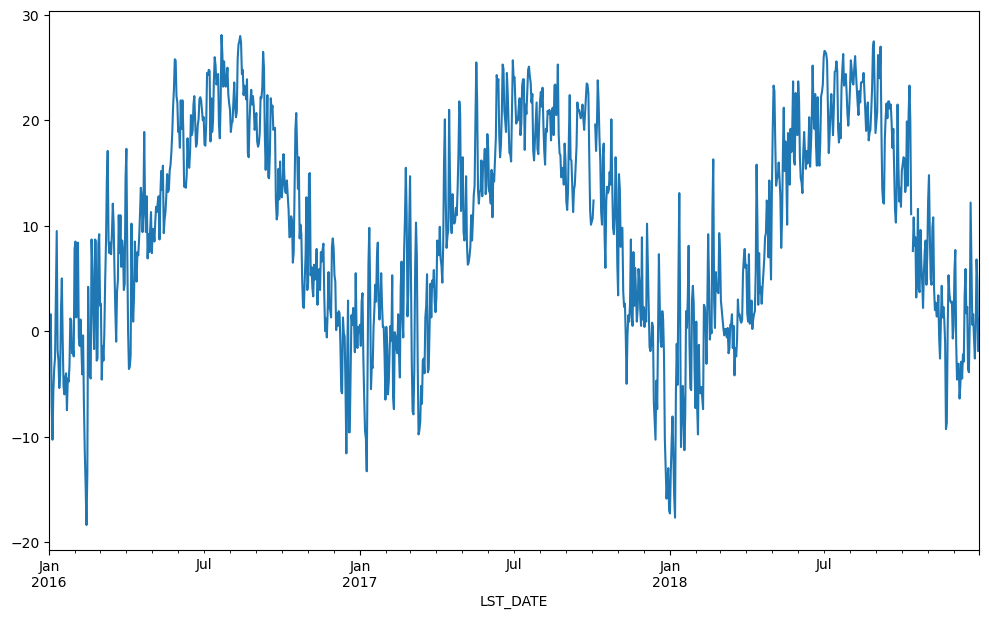

In [63]:
df.T_DAILY_MEAN.plot()

A common way to analyze such data in climate science is to create a "climatology," which contains the average values in each month or day of the year. We can do this easily with groupby. Recall that `df.index` is a pandas `DateTimeIndex` object.

In [64]:
# monthly_climatology = df.groupby(df.index.month).mean()
# monthly_climatology

monthly_climatology = df.T_DAILY_MEAN.groupby(df.index.month).mean()
monthly_climatology

LST_DATE
1     -2.100000
2      0.712941
3      2.455914
4      8.302222
5     14.850538
6     18.733333
7     22.054839
8     21.410753
9     18.057778
10    11.938462
11     4.097778
12    -1.069892
Name: T_DAILY_MEAN, dtype: float64

Each row in this new dataframe respresents the average values for the months (1=January, 2=February, etc.)

We can apply more customized aggregations, as with any groupby operation. Below we keep the mean of the mean, max of the max, and min of the min for the temperature measurements.

In [54]:
monthly_T_climatology = df.groupby(df.index.month).aggregate({'T_DAILY_MEAN': 'mean',
                                                              'T_DAILY_MAX': 'max',
                                                              'T_DAILY_MIN': 'min'})
monthly_T_climatology.head()

,T_DAILY_MEAN,T_DAILY_MAX,T_DAILY_MIN
LST_DATE,,,
1,-2.100000,16.9,-26.0
2,0.712941,24.9,-24.7
3,2.455914,26.8,-16.5
4,8.302222,30.6,-11.3
5,14.850538,33.4,-1.6


<Axes: xlabel='LST_DATE'>

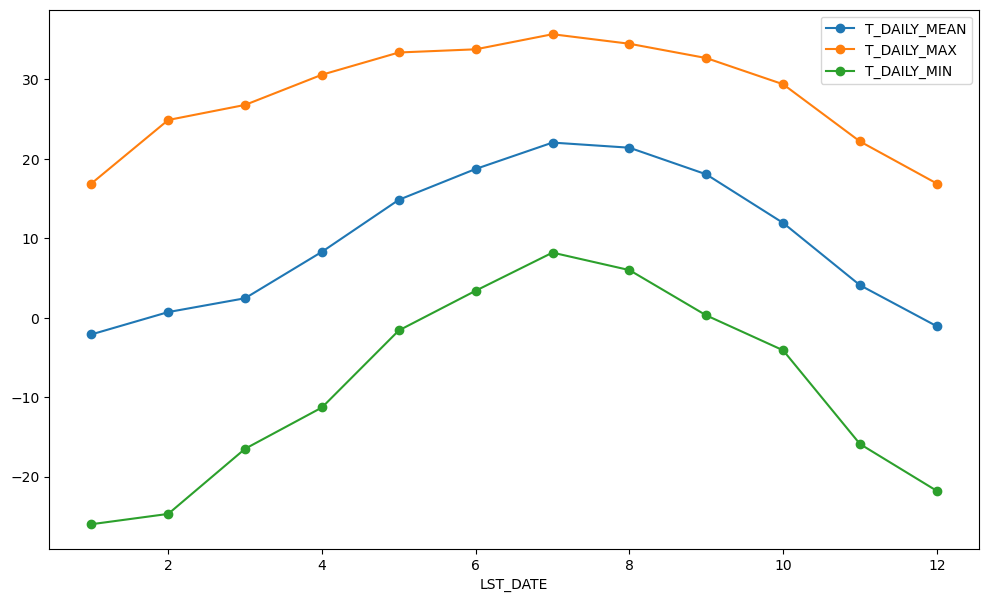

In [55]:
monthly_T_climatology.plot(marker='o')

If we want to do it on a finer scale, we can group by day of year.

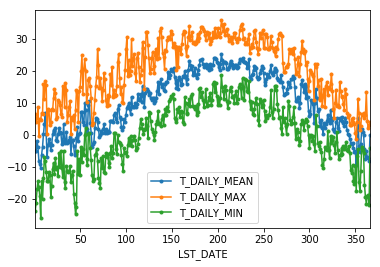

In [29]:
daily_T_climatology = df.groupby(df.index.dayofyear).aggregate({'T_DAILY_MEAN': 'mean',
                                                            'T_DAILY_MAX': 'max',
                                                            'T_DAILY_MIN': 'min'})
daily_T_climatology.plot(marker='.')

### Calculating anomalies

A common mode of analysis in climate science is to remove the climatology from a signal to focus only on the "anomaly" values. This can be accomplished with transformation.

In [56]:
def standardize(x):
    return (x - x.mean())/x.std()

anomaly = df.groupby(df.index.month).transform(standardize)
anomaly.plot(y='T_DAILY_MEAN')

TypeError: Could not convert string 'CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC' to numeric

### Resampling

Another common operation is to change the resolution of a dataset by resampling in time. Pandas exposes this through the [resample](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#resampling) function. The resample periods are specified using pandas [offset index](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases) syntax.

Below we resample the dataset by taking the mean over each month.

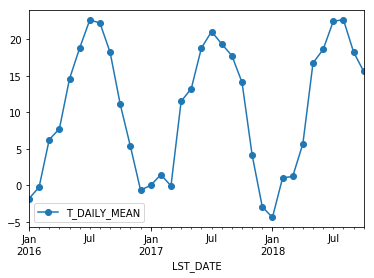

In [31]:
df.resample('M').mean().plot(y='T_DAILY_MEAN', marker='o')

Just like with `groupby`, we can apply any aggregation function to our `resample` operation.

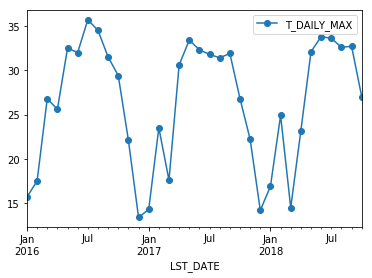

In [32]:
df.resample('M').max().plot(y='T_DAILY_MAX', marker='o')

### Rolling Operations

The final category of operations applies to "rolling windows". (See [rolling](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html) documentation.) We specify a function to apply over a moving window along the index. We specify the size of the window and, optionally, the weights. We also use the keyword `centered` to tell pandas whether to center the operation around the midpoint of the window.

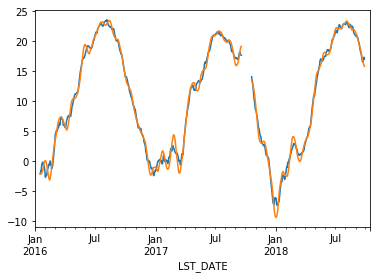

In [33]:
df.rolling(30, center=True).T_DAILY_MEAN.mean().plot()
df.rolling(30, center=True, win_type='triang').T_DAILY_MEAN.mean().plot()